 # Task 3: Customer Segmentation/Clustering


Step 1: Data Preparation




1.   Combining Profile and Transaction Data: Merge Customers.csv with relevant data from Transactions.csv to create a comprehensive dataset.

2.   Feature Engineering


*   Aggregate transaction data (e.g., total spending, number of transactions, average transaction value).
*   Combine it with customer profile data

3. Handling Missing Values: Ensuring there are no missing values in the combined dataset.

4.scale Features: Normalize numerical features for clustering.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")


transaction_summary = transactions.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    transaction_count=("TransactionID", "count"),
    avg_transaction_value=("TotalValue", "mean")
).reset_index()

# Merge with Customer Data
combined_data = pd.merge(customers, transaction_summary, on="CustomerID", how="left")

# Handle Missing Values
combined_data.fillna(0, inplace=True)

# Select Features for Clustering
features = ["total_spent", "transaction_count", "avg_transaction_value"]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_data[features])

# Step 2: Clustering

1. Choose Clustering Algorithm: Start with K-Means as it’s simple and effective for segmentation.

2. Determine Optimal Clusters:

* Use the Elbow Method to find the optimal number of clusters.

* Validating with Silhouette Score.

3. Fit Clustering Model: Apply K-Means with the optimal number of clusters.

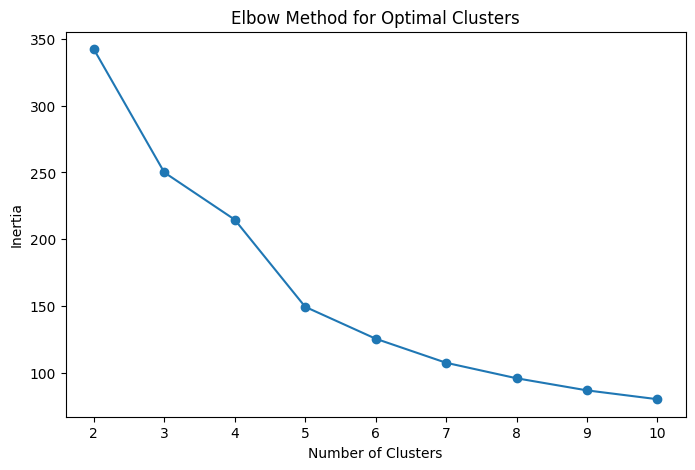

In [3]:
inertia = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker="o")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
combined_data["Cluster"] = kmeans.fit_predict(scaled_features)


# Step 3: Evaluation Metrics



In [4]:
db_index = davies_bouldin_score(scaled_features, combined_data["Cluster"])
silhouette_avg = silhouette_score(scaled_features, combined_data["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")


Davies-Bouldin Index: 1.0742466760923444
Silhouette Score: 0.29989395957395887


# Step 4: Visualization

# Dimensionality Reduction with PCA

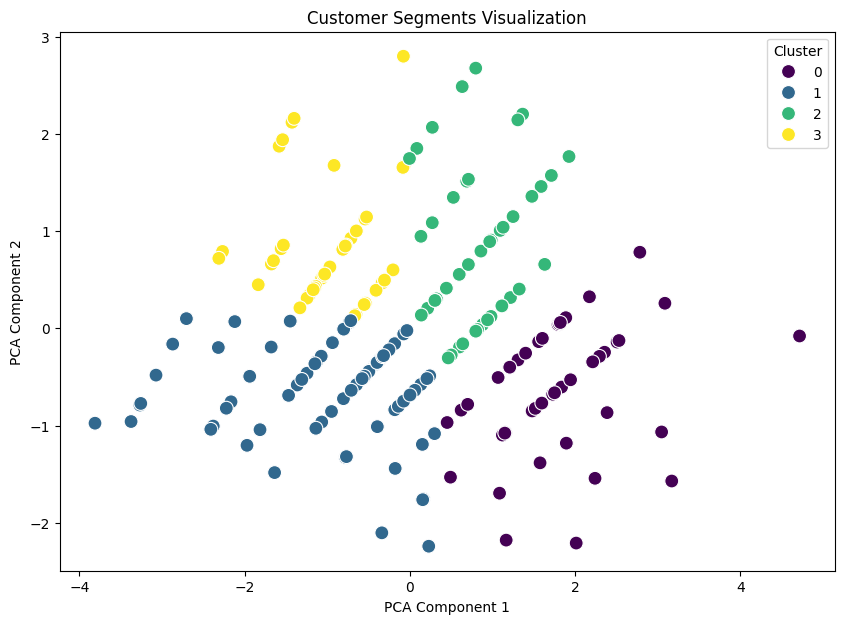

In [5]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=pca_features[:, 0],
    y=pca_features[:, 1],
    hue=combined_data["Cluster"],
    palette="viridis",
    s=100
)
plt.title("Customer Segments Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Saving results
combined_data.to_csv("Clustered_Customers.csv", index=False)
